In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('netflix_titles.csv')

In [3]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.describe(include="object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df['director'].fillna('Unknown',inplace=True)
df['cast'].fillna('Unknown',inplace=True)
df['country'].fillna('Unknown',inplace=True)

In [9]:
df['date_added'].fillna(method='ffill',inplace= True)
df['rating'].fillna(method='ffill',inplace= True)
df['duration'].fillna(method='ffill',inplace= True)

In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Visualization

Text(0.5, 1.0, 'Movies vs TVShows Distribution')

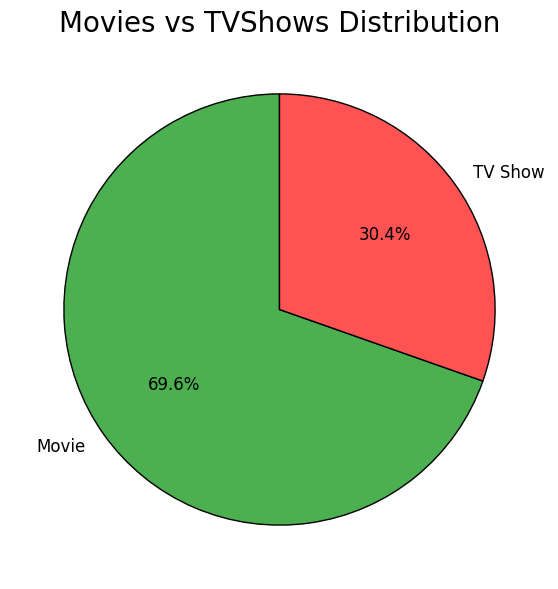

In [11]:
plt.figure(figsize=(7,7))
x= df['type'].value_counts()
plt.pie(x,labels=x.index,autopct='%1.1f%%',startangle=90,wedgeprops={'edgecolor':'black','width':1},colors=['#4CAF50', '#FF5252'],textprops={'fontsize': 12})
plt.title('Movies vs TVShows Distribution',fontsize=20,color='black')

In [12]:
df.groupby('release_year')['title'].count()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: title, Length: 74, dtype: int64

In [13]:
y= df.pivot_table(index= 'release_year',columns='type',values='title',aggfunc="count")
y

type,Movie,TV Show
release_year,,
1925,NaN,1.0
1942,2.0,NaN
1943,3.0,NaN
1944,3.0,NaN
1945,3.0,1.0
...,...,...
2017,767.0,265.0
2018,767.0,380.0
2019,633.0,397.0


Text(0, 0.5, 'Count')

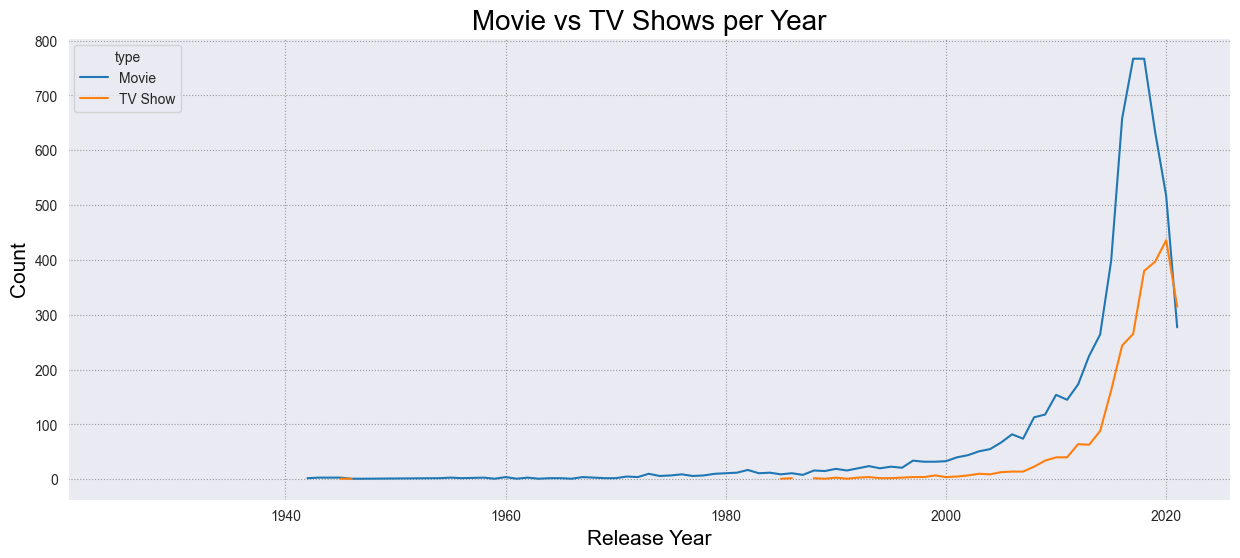

In [14]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
y.plot(kind='line', figsize=(15,6))
plt.title('Movie vs TV Shows per Year',fontsize=20,color='black')
plt.xlabel('Release Year',fontsize=15,color='black')
plt.ylabel('Count',fontsize=15,color='black')

In [15]:
x= df.pivot_table(index='rating',columns='type',values='title',aggfunc='count')
x

type,Movie,TV Show
rating,,
66 min,1.0,NaN
74 min,1.0,NaN
84 min,1.0,NaN
G,41.0,NaN
NC-17,3.0,NaN
NR,75.0,5.0
PG,287.0,NaN
PG-13,490.0,NaN
R,798.0,3.0


Text(0.5, 1.0, 'Number of titles on Rating and Types')

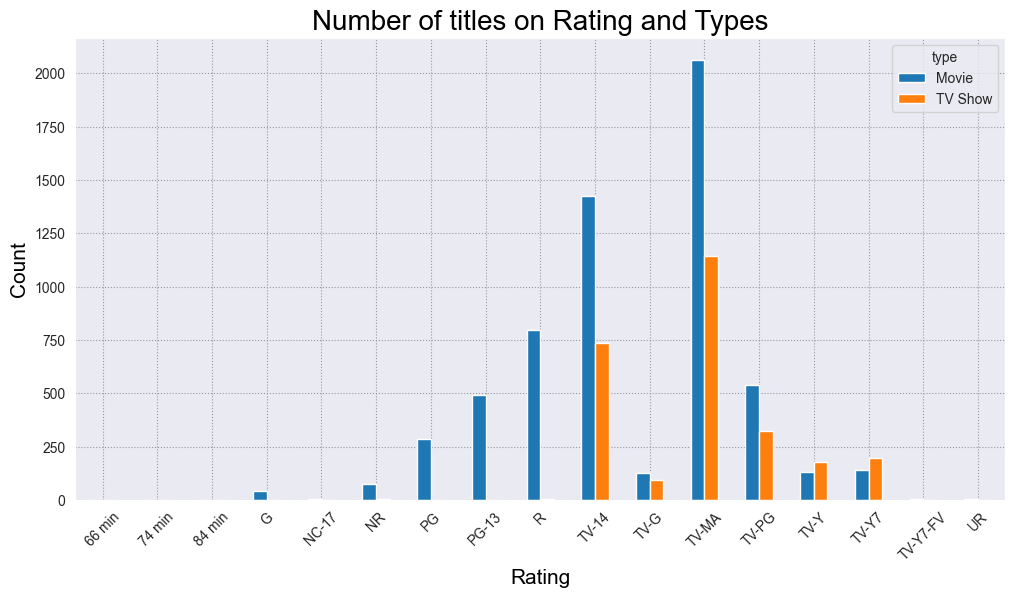

In [16]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
x.plot(kind='bar',figsize=(12,6))
plt.xticks(rotation=45)
plt.xlabel('Rating',color='black',fontsize=15)
plt.ylabel('Count',color='black',fontsize=15)
plt.title('Number of titles on Rating and Types',color='black',fontsize=20)

# Analyze Top 5 Directors

In [48]:
top_5_directors = (
    df['director']
    .str.split(', ')
    .explode()
    .value_counts()
    .drop('Unknown', errors='ignore') 
    .head(5)
)

In [49]:
top_5_directors

director
Rajiv Chilaka    22
Jan Suter        21
Raúl Campos      19
Suhas Kadav      16
Marcus Raboy     16
Name: count, dtype: int64

Text(0, 0.5, 'Count')

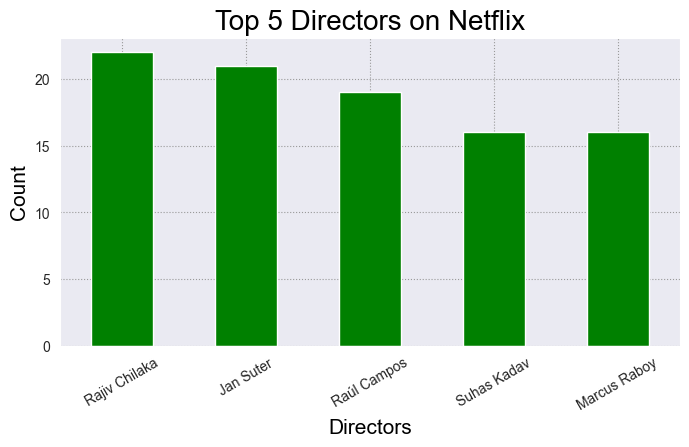

In [65]:
top_5_directors.plot(
    kind='bar',
    figsize=(8,4),
    rot=30,
    color='green'
)

plt.title('Top 5 Directors on Netflix',color='black',fontsize=20)
plt.xlabel('Directors',fontsize=15,color='black')
plt.ylabel('Count',fontsize=15,color='black')

# Analyze Top 5 actors

In [66]:
top_5_actors = (
    df['cast']
    .str.split(', ')
    .explode()
    .value_counts()
    .drop('Unknown', errors='ignore') 
    .head(5)
)
top_5_actors

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Name: count, dtype: int64

Text(0, 0.5, 'Count')

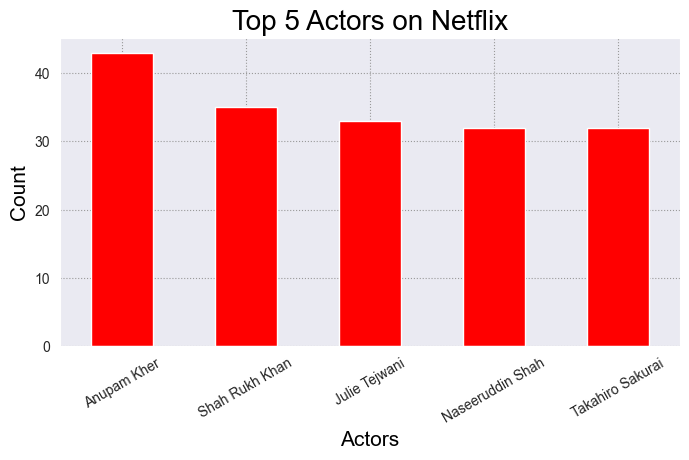

In [71]:
top_5_actors.plot(
    kind='bar',
    figsize=(8,4),
    rot=30,
    color='red'
)

plt.title('Top 5 Actors on Netflix',color='black',fontsize=20)
plt.xlabel('Actors',fontsize=15,color='black')
plt.ylabel('Count',fontsize=15,color='black')

Text(0, 0.5, 'Number of Titles')

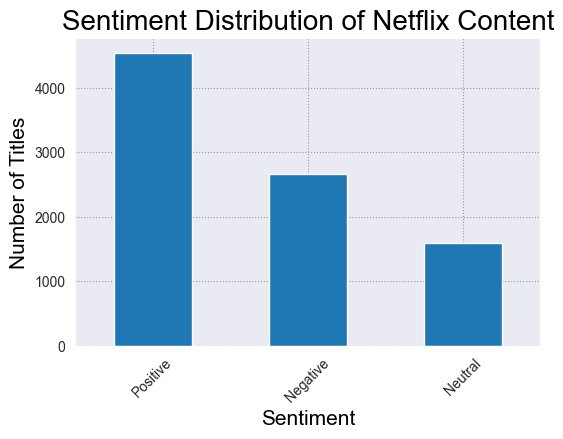

In [79]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_score'] = df['description'].apply(get_sentiment)

def sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(sentiment_label)

df['sentiment'].value_counts().plot(
    kind='bar',
    figsize=(6,4)
)
plt.title('Sentiment Distribution of Netflix Content',color='black',fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Sentiment',fontsize=15,color='black')
plt.ylabel('Number of Titles',fontsize=15,color='black')


Text(0, 0.5, 'Count')

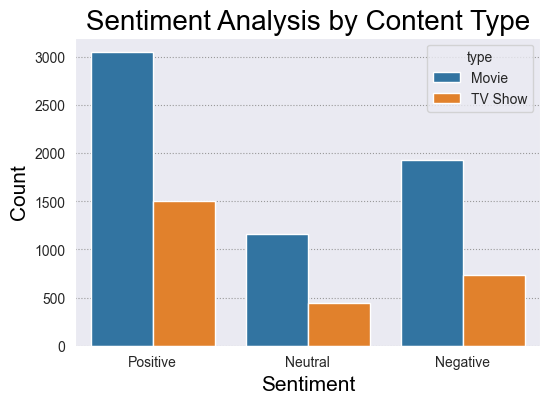

In [81]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', hue='type')
plt.title('Sentiment Analysis by Content Type',fontsize=20,color='black')
plt.xlabel('Sentiment',fontsize=15,color='black')
plt.ylabel('Count',fontsize=15,color='black')


Text(0, 0.5, 'Frequency')

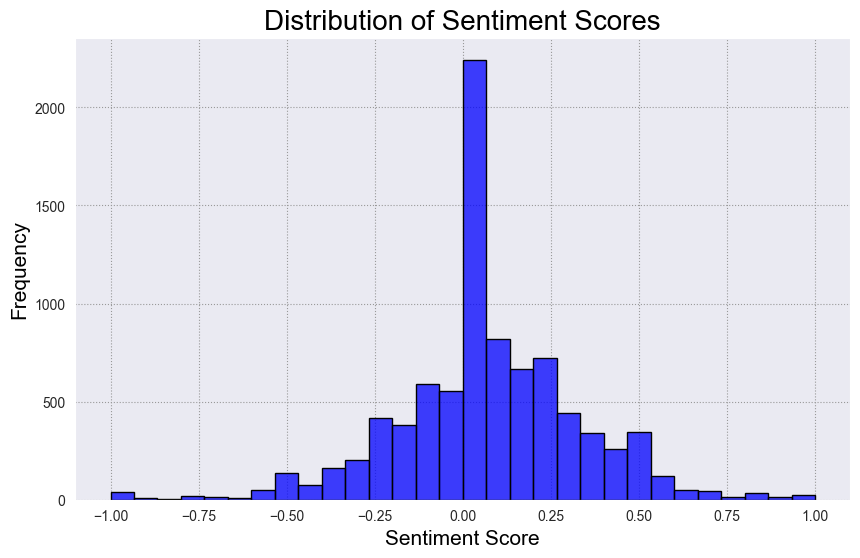

In [102]:
plt.figure(figsize=(10,6))
sns.histplot(df['sentiment_score'], bins=30,color='blue',edgecolor='black')
plt.title('Distribution of Sentiment Scores',fontsize=20,color='black')
plt.xlabel('Sentiment Score',fontsize=15,color='black')
plt.ylabel('Frequency',fontsize=15,color='black')
